<a href="https://colab.research.google.com/github/rorre97/countries/blob/master/TFM_EUROPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CARGA DEL CSV

In [ ]:
import pandas as pd
import io
data = pd.read_csv('/content/DATOS EUROPA NASA FLUME.csv', delimiter=',', error_bad_lines=False)
#es importante poner que el delimitador es una , ya que pondría toda la info junta.

In [ ]:
data.head()

,LAT,LON,PARAMETER,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.25,1.25,PRECTOT,1.92,1.64,1.61,2.40,2.36,2.02,1.44,1.57,1.96,1.95,2.21,1.87,1.91
1,44.25,1.25,T2M,4.23,5.21,8.28,11.12,15.42,19.11,21.93,22.18,18.22,13.98,8.01,4.99,12.72
2,44.25,1.25,WS2M,2.55,2.75,2.75,2.72,2.37,2.28,2.19,2.04,2.15,2.48,2.49,2.51,2.44
3,44.25,1.75,PRECTOT,1.89,1.67,1.65,2.47,2.42,2.03,1.36,1.56,2.03,2.02,2.24,1.89,1.94
4,44.25,1.75,T2M,3.74,4.65,7.72,10.56,14.88,18.58,21.43,21.69,17.71,13.47,7.54,4.53,12.21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LAT        6444 non-null   float64
 1   LON        6444 non-null   float64
 2   PARAMETER  6444 non-null   object 
 3   JAN        6444 non-null   object 
 4   FEB        6444 non-null   object 
 5   MAR        6444 non-null   object 
 6   APR        6444 non-null   object 
 7   MAY        6444 non-null   object 
 8   JUN        6444 non-null   object 
 9   JUL        6444 non-null   object 
 10  AUG        6444 non-null   object 
 11  SEP        6444 non-null   object 
 12  OCT        6444 non-null   object 
 13  NOV        6444 non-null   object 
 14  DEC        6444 non-null   object 
 15  ANN        6444 non-null   object 
dtypes: float64(2), object(14)
memory usage: 805.6+ KB


In [ ]:
data.dropna(inplace=True)
data.isna().sum()

LAT          0
LON          0
PARAMETER    0
JAN          0
FEB          0
MAR          0
APR          0
MAY          0
JUN          0
JUL          0
AUG          0
SEP          0
OCT          0
NOV          0
DEC          0
ANN          0
dtype: int64

In [ ]:
data.columns

Index(['LAT', 'LON', 'PARAMETER', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN'],
      dtype='object')

In [ ]:
data.shape

(6444, 16)

In [ ]:
import numpy as np

In [ ]:
data['JAN'] = data['JAN'].str.replace('%','').astype(np.float64)
data['FEB'] = data['FEB'].str.replace('%','').astype(np.float64)
data['MAR'] = data['MAR'].str.replace('%','').astype(np.float64)
data['APR'] = data['APR'].str.replace('%','').astype(np.float64)
data['MAY'] = data['MAY'].str.replace('%','').astype(np.float64)
data['JUN'] = data['JUN'].str.replace('%','').astype(np.float64)
data['JUL'] = data['JUL'].str.replace('%','').astype(np.float64)
data['AUG'] = data['AUG'].str.replace('%','').astype(np.float64)
data['SEP'] = data['SEP'].str.replace('%','').astype(np.float64)
data['OCT'] = data['OCT'].str.replace('%','').astype(np.float64)
data['NOV'] = data['NOV'].str.replace('%','').astype(np.float64)
data['DEC'] = data['DEC'].str.replace('%','').astype(np.float64)
data['ANN'] = data['ANN'].str.replace('%','').astype(np.float64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6444 entries, 0 to 6443
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LAT        6444 non-null   float64
 1   LON        6444 non-null   float64
 2   PARAMETER  6444 non-null   object 
 3   JAN        6444 non-null   float64
 4   FEB        6444 non-null   float64
 5   MAR        6444 non-null   float64
 6   APR        6444 non-null   float64
 7   MAY        6444 non-null   float64
 8   JUN        6444 non-null   float64
 9   JUL        6444 non-null   float64
 10  AUG        6444 non-null   float64
 11  SEP        6444 non-null   float64
 12  OCT        6444 non-null   float64
 13  NOV        6444 non-null   float64
 14  DEC        6444 non-null   float64
 15  ANN        6444 non-null   float64
dtypes: float64(15), object(1)
memory usage: 855.8+ KB


# ORDENAR LA INFORMACIÓN

In [ ]:
data_v2 = pd.melt(data, id_vars=['LAT', 'LON', 'PARAMETER'], value_vars=['ANN'])
data_v2.head()

,LAT,LON,PARAMETER,variable,value
0,44.25,1.25,PRECTOT,ANN,1.91
1,44.25,1.25,T2M,ANN,12.72
2,44.25,1.25,WS2M,ANN,2.44
3,44.25,1.75,PRECTOT,ANN,1.94
4,44.25,1.75,T2M,ANN,12.21


In [ ]:
data_v2 = data_v2.pivot(columns='PARAMETER', values='value', index=['LAT', 'LON','variable'])
data_v2.reset_index(inplace=True)
data_v2.head()

PARAMETER,LAT,LON,variable,PRECTOT,T2M,WS2M
0,36.25,11.25,ANN,1.20,19.19,4.76
1,36.25,11.75,ANN,1.22,19.15,4.87
2,36.25,12.25,ANN,1.32,19.13,4.93
3,36.25,12.75,ANN,1.44,19.14,4.95
4,36.25,13.25,ANN,1.54,19.18,4.94


In [ ]:
data_v2['T2M'].fillna(0, inplace=True)
data_v2['WS2M'].fillna(0, inplace=True)

In [ ]:
data_v2.head()

PARAMETER,LAT,LON,variable,PRECTOT,T2M,WS2M
0,36.25,11.25,ANN,1.20,19.19,4.76
1,36.25,11.75,ANN,1.22,19.15,4.87
2,36.25,12.25,ANN,1.32,19.13,4.93
3,36.25,12.75,ANN,1.44,19.14,4.95
4,36.25,13.25,ANN,1.54,19.18,4.94


# 3. AÑADIR EL PAÍS A CADA REGISTRO

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 3.9MB/s 
     |████████████████████████████████| 6.5MB 30.8MB/s 
     |████████████████████████████████| 14.8MB 317kB/s 


In [ ]:
import countries
cc = countries.CountryChecker('TM_WORLD_BORDERS-0.3.shp')
print(cc.getCountry(countries.Point(44.25, 1.25)))

France


In [ ]:
data_v2_pais = data_v2.loc[:, ['LAT', 'LON', 'PRECTOT', 'T2M', 'WS2M']].copy()

In [ ]:
data_v2_pais.shape

(2148, 5)

In [ ]:
data_v2_pais = data_v2_pais.drop_duplicates(keep='first', subset=['LAT', 'LON'])

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [ ]:
data_v2_pais

PARAMETER,LAT,LON,PRECTOT,T2M,WS2M
0,36.25,11.25,1.20,19.19,4.76
1,36.25,11.75,1.22,19.15,4.87
2,36.25,12.25,1.32,19.13,4.93
3,36.25,12.75,1.44,19.14,4.95
4,36.25,13.25,1.54,19.18,4.94
...,...,...,...,...,...
2143,65.25,25.25,1.97,1.96,1.71
2144,65.25,25.75,2.08,1.50,0.96
2145,65.25,26.25,2.16,1.06,0.55
2146,65.25,26.75,2.20,0.77,0.44


In [ ]:
def obtener_pais(lon, lat):
    pais = cc.getCountry(countries.Point(lat, lon))
    if pais is None:
        return "desconocido"
    return pais

data_v2_pais.loc[:, 'Pais'] = data_v2_pais.loc[:, ['LAT', 'LON']].apply(lambda row: obtener_pais(row['LON'], row['LAT']), axis=1)

In [ ]:
data_v2_pais = data_v2_pais[data_v2_pais['Pais']!='desconocido']

In [ ]:
data_v2_pais

PARAMETER,LAT,LON,PRECTOT,T2M,WS2M,Pais
17,36.75,14.75,1.41,18.49,3.59,Italy
30,37.25,-8.25,1.40,17.18,3.60,Portugal
31,37.25,-7.75,1.37,17.58,3.44,Portugal
32,37.25,-7.25,1.34,17.87,3.35,Spain
33,37.25,-6.75,1.32,17.93,3.17,Spain
...,...,...,...,...,...,...
2137,64.75,27.25,2.30,0.90,0.83,Finland
2144,65.25,25.75,2.08,1.50,0.96,Finland
2145,65.25,26.25,2.16,1.06,0.55,Finland
2146,65.25,26.75,2.20,0.77,0.44,Finland


In [ ]:
data_v2_pais = data_v2_pais[['Pais','LAT','LON','PRECTOT', 'T2M', 'WS2M']]

In [ ]:
data_v2_pais

PARAMETER,Pais,LAT,LON,PRECTOT,T2M,WS2M
17,Italy,36.75,14.75,1.41,18.49,3.59
30,Portugal,37.25,-8.25,1.40,17.18,3.60
31,Portugal,37.25,-7.75,1.37,17.58,3.44
32,Spain,37.25,-7.25,1.34,17.87,3.35
33,Spain,37.25,-6.75,1.32,17.93,3.17
...,...,...,...,...,...,...
2137,Finland,64.75,27.25,2.30,0.90,0.83
2144,Finland,65.25,25.75,2.08,1.50,0.96
2145,Finland,65.25,26.25,2.16,1.06,0.55
2146,Finland,65.25,26.75,2.20,0.77,0.44


In [ ]:
data_v2_pais.to_csv("conpaises.csv", sep=";", index=False)

In [ ]:
data_v2_pais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 17 to 2147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pais     1744 non-null   object 
 1   LAT      1744 non-null   float64
 2   LON      1744 non-null   float64
 3   PRECTOT  1744 non-null   float64
 4   T2M      1744 non-null   float64
 5   WS2M     1744 non-null   float64
dtypes: float64(5), object(1)
memory usage: 95.4+ KB


In [ ]:
data_v2_pais.head()

PARAMETER,Pais,LAT,LON,PRECTOT,T2M,WS2M
17,Italy,36.75,14.75,1.41,18.49,3.59
30,Portugal,37.25,-8.25,1.40,17.18,3.60
31,Portugal,37.25,-7.75,1.37,17.58,3.44
32,Spain,37.25,-7.25,1.34,17.87,3.35
33,Spain,37.25,-6.75,1.32,17.93,3.17


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')


In [ ]:
data_v2_pais['Pais'] = data_v2_pais['Pais'].astype('category')

In [ ]:
db = pd.read_csv('/content/conpaises.csv', delimiter=';', error_bad_lines=False)

In [ ]:
db.head()

,Pais,LAT,LON,PRECTOT,T2M,WS2M
0,Italy,36.75,14.75,1.41,18.49,3.59
1,Portugal,37.25,-8.25,1.40,17.18,3.60
2,Portugal,37.25,-7.75,1.37,17.58,3.44
3,Spain,37.25,-7.25,1.34,17.87,3.35
4,Spain,37.25,-6.75,1.32,17.93,3.17


In [ ]:
import matplotlib.font_manager as font_manager

In [ ]:
db['Pais'].nunique()

37

Text(0, 0.5, 'PAISES')

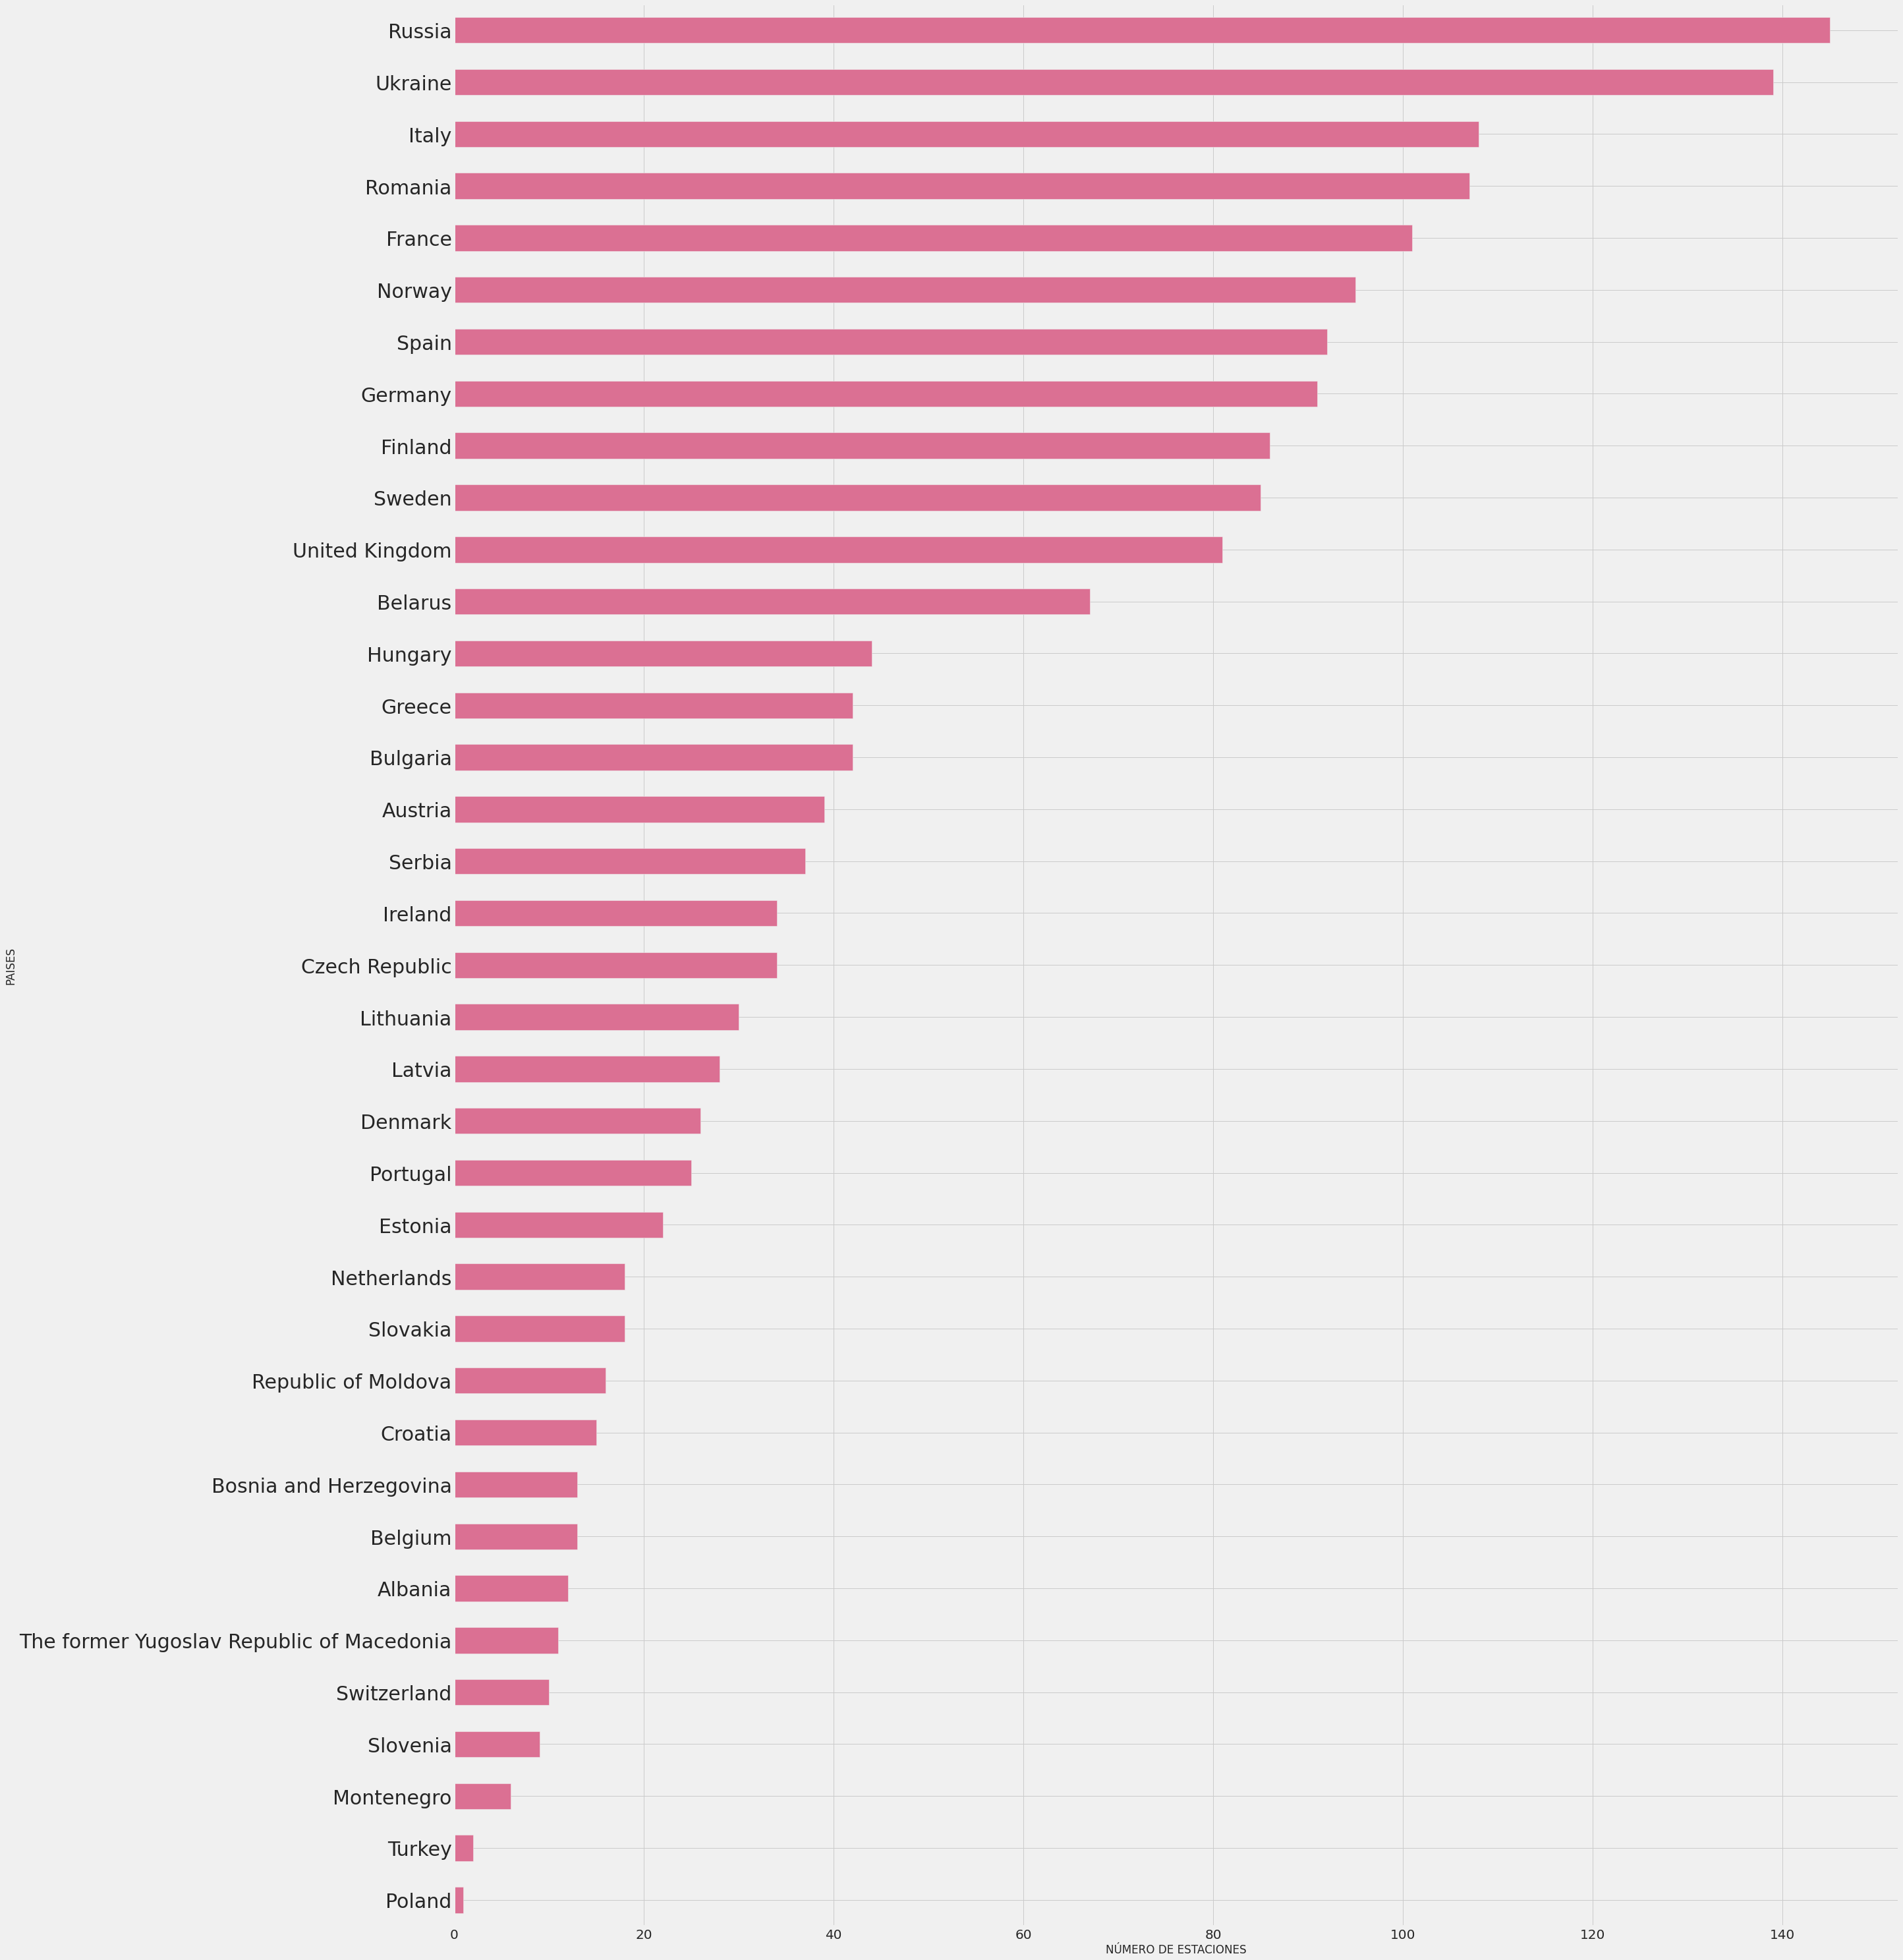

In [ ]:
plt.figure(figsize=(35,50))
plt.yticks(fontsize=30)
plt.xticks(fontsize=20)
grafico1bd =db['Pais'].value_counts().sort_values(ascending= True).plot(kind = 'barh', width = 0.5, color = 'palevioletred')
grafico1bd.set_xlabel('NÚMERO DE ESTACIONES')
grafico1bd.set_ylabel('PAISES')

Text(0, 0.5, 'PROMEDIO DE PRECIPITACIONES MM/DÍA')

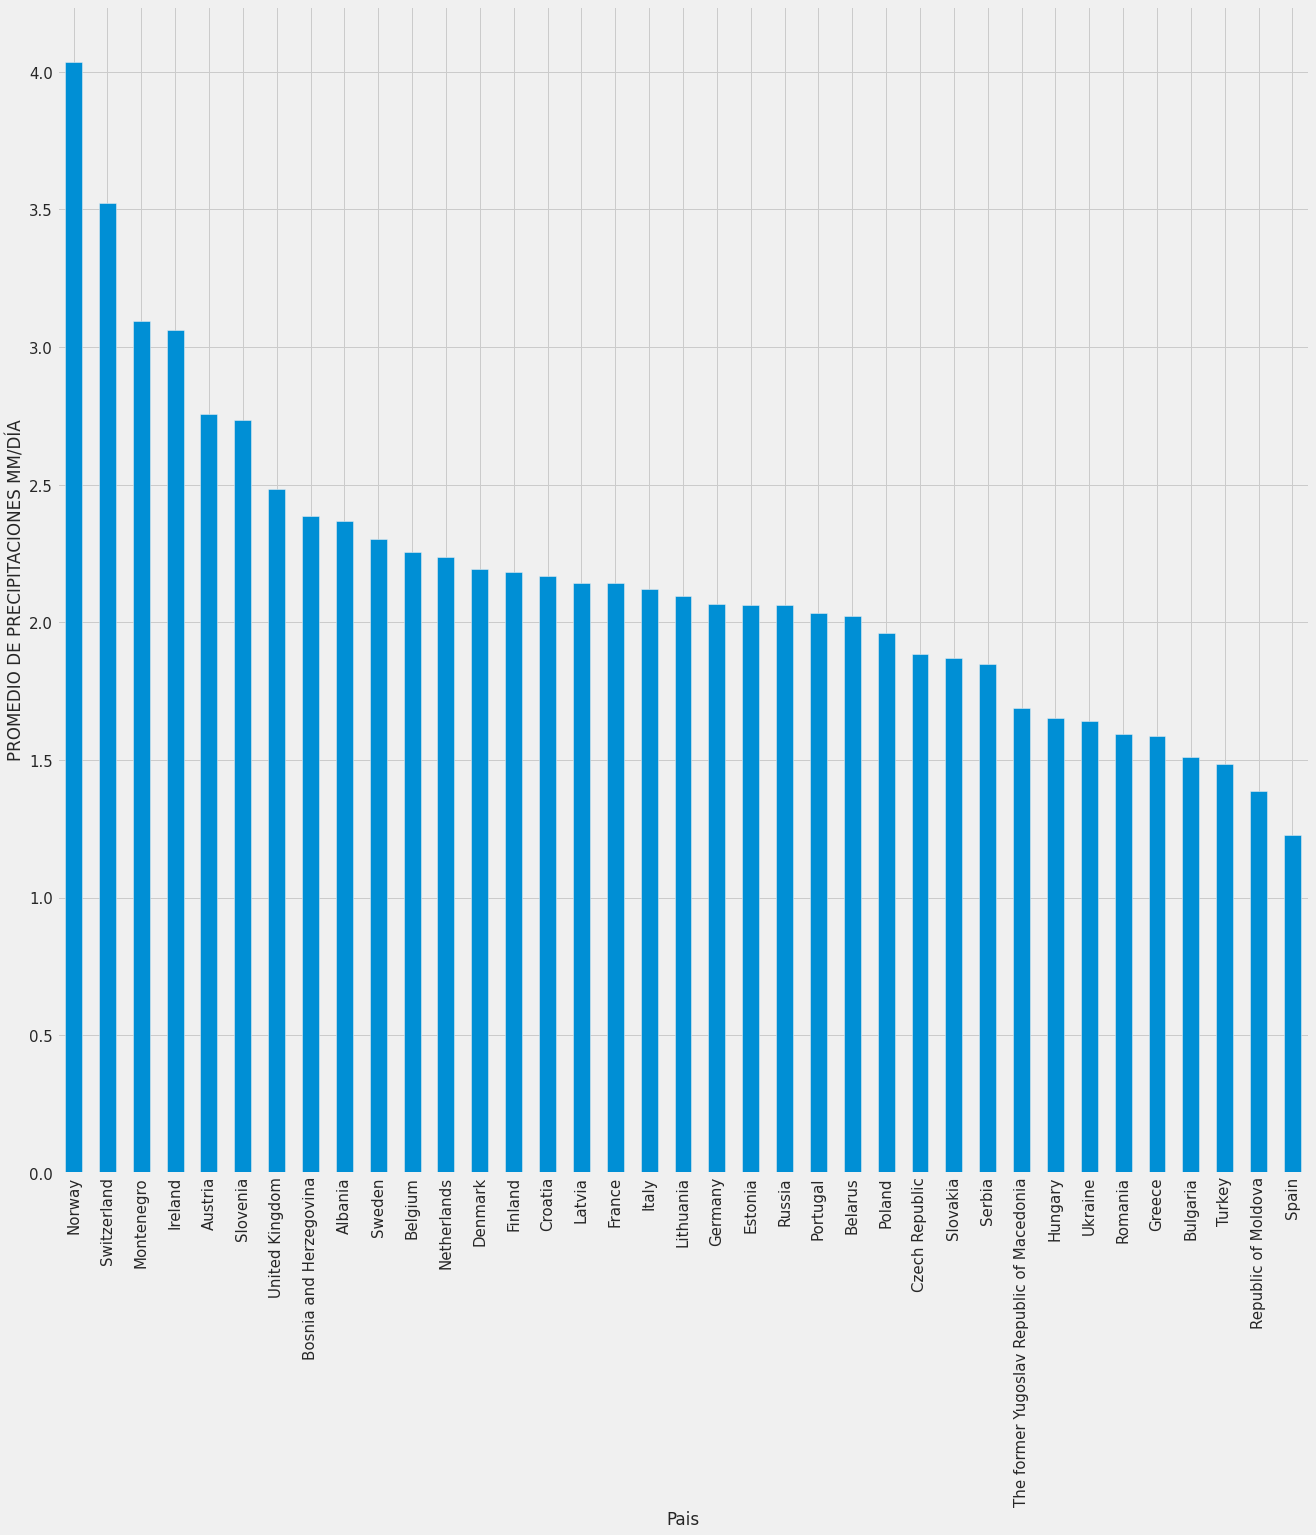

In [ ]:
#PRECIPITACIONES SEGÚN LOS PAÍSES
plt.figure(figsize=(20,20))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
dbprectot = db.groupby('Pais').mean()['PRECTOT'].sort_values(ascending=False).plot(kind="bar")
dbprectot.set_ylabel('PROMEDIO DE PRECIPITACIONES MM/DÍA')

Text(0, 0.5, 'PROMEDIO TEMPERATURA A 2 METROS')

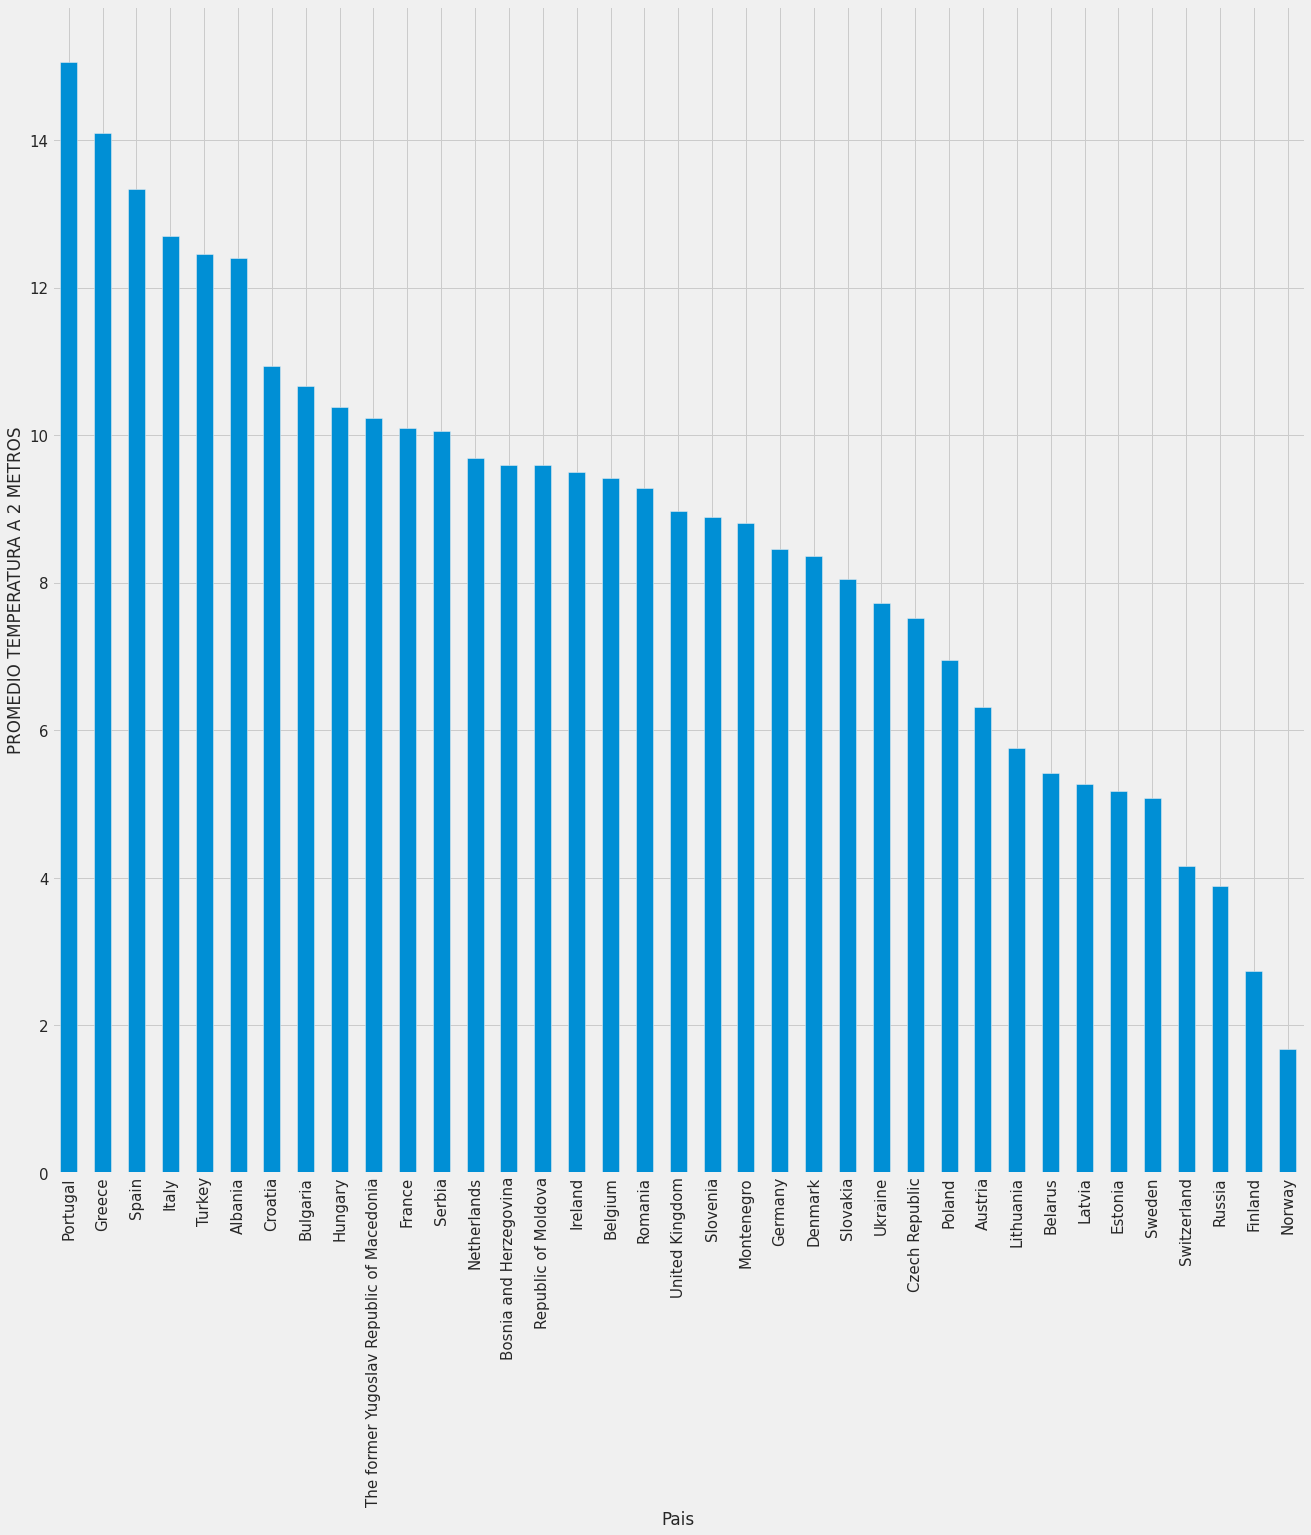

In [ ]:
#TEMPERATURA SEGÚN LOS PAÍSES
plt.figure(figsize=(20,20))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
dbt2m = db.groupby('Pais').mean()['T2M'].sort_values(ascending=False).plot(kind="bar")
dbt2m.set_ylabel('PROMEDIO TEMPERATURA A 2 METROS')

Text(0, 0.5, 'PROMEDIO DE VELOCIDAD DEL VIENTO A 2 METROS')

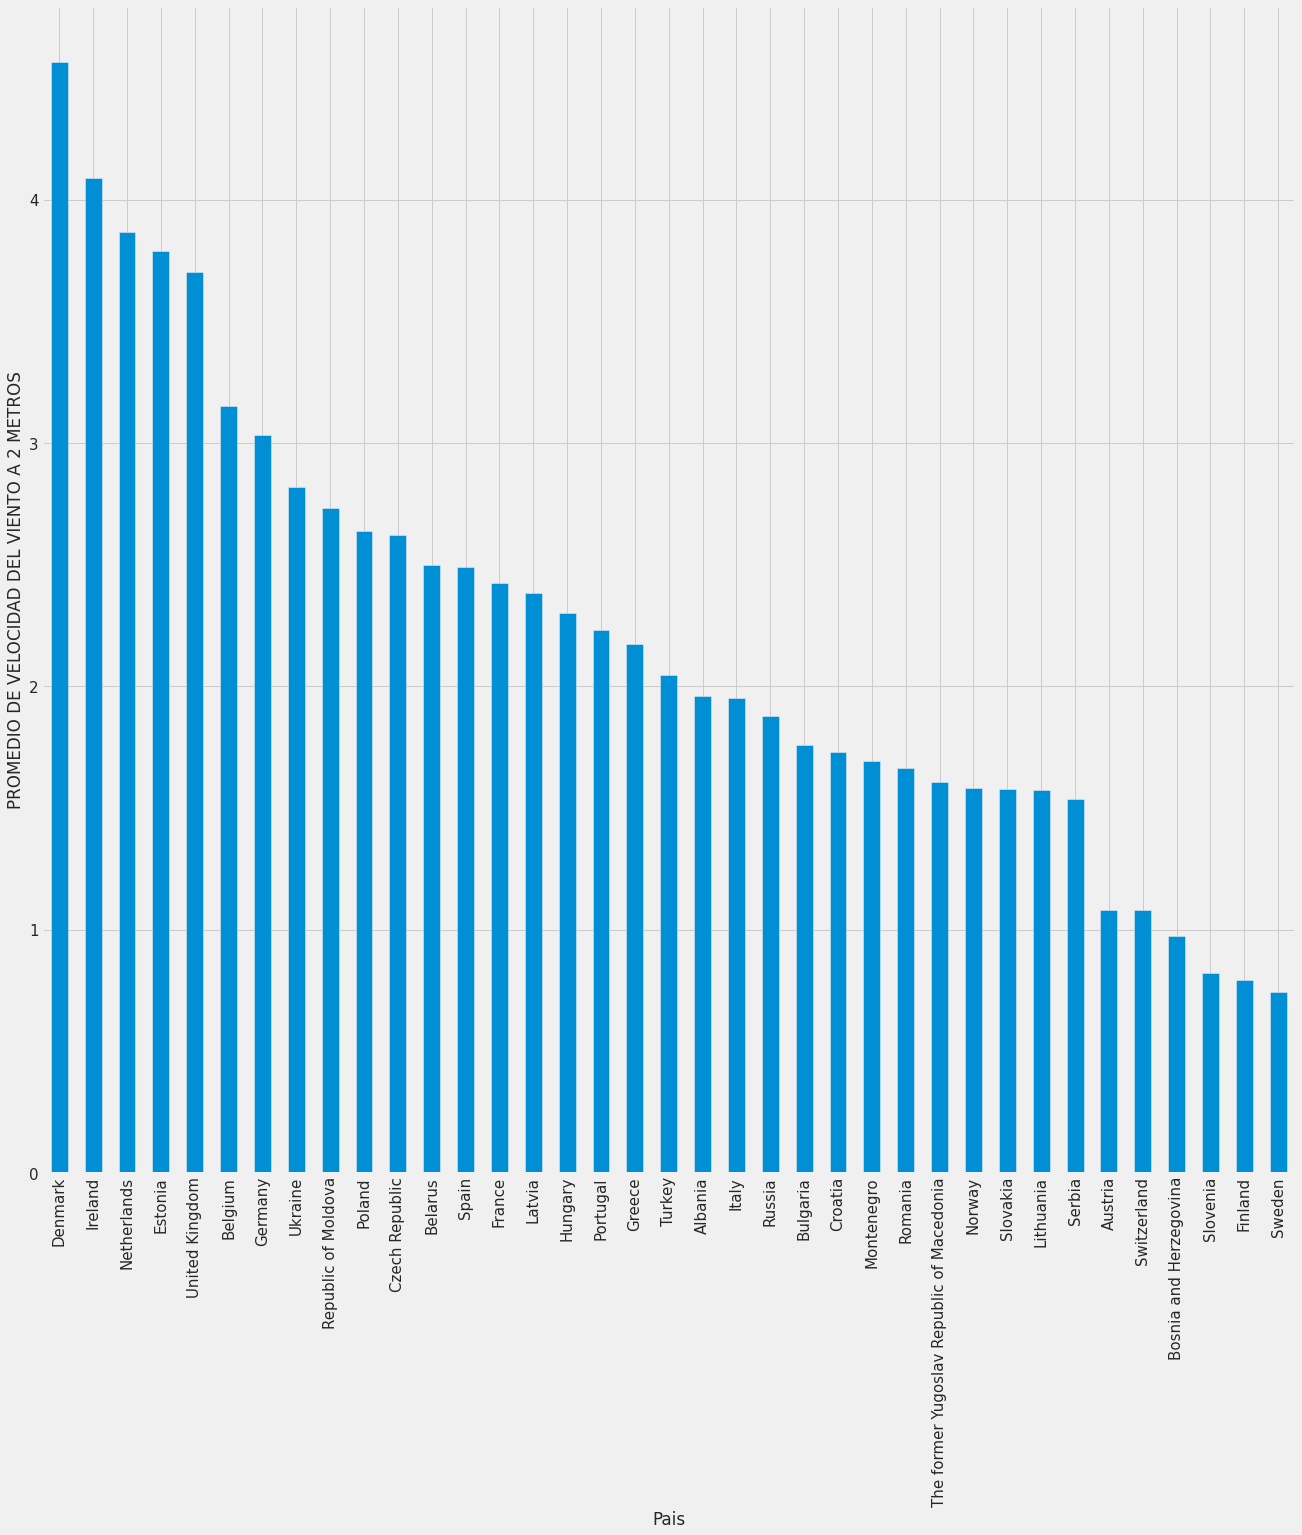

In [ ]:
#VELOCIDAD DEL VIENTO SEGÚN LOS PAÍSES
plt.figure(figsize=(20,20))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
dbws2m = db.groupby('Pais').mean()['WS2M'].sort_values(ascending=False).plot(kind="bar")
dbws2m.set_ylabel('PROMEDIO DE VELOCIDAD DEL VIENTO A 2 METROS')

# 6. ANÁLISIS DE LAS VARIABLES

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

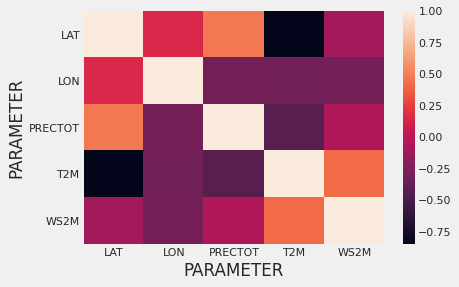

In [ ]:
import seaborn as sns
corr = data_v2.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [ ]:
correlaciones = data_v2.corr()
correlaciones = correlaciones['PRECTOT'].sort_values(ascending=False)
correlaciones

PARAMETER
PRECTOT    1.000000
LAT        0.478295
WS2M      -0.054485
LON       -0.294079
T2M       -0.418900
Name: PRECTOT, dtype: float64

In [ ]:
correlaciones = data_v2.corr()
correlaciones = correlaciones['T2M'].sort_values(ascending=False)
correlaciones

PARAMETER
T2M        1.000000
WS2M       0.427878
LON       -0.311331
PRECTOT   -0.418900
LAT       -0.849658
Name: T2M, dtype: float64

In [ ]:
correlaciones = data_v2.corr()
correlaciones = correlaciones['WS2M'].sort_values(ascending=False)
correlaciones

PARAMETER
WS2M       1.000000
T2M        0.427878
PRECTOT   -0.054485
LAT       -0.101534
LON       -0.299971
Name: WS2M, dtype: float64

3.1. PRECTOT

Text(0, 0.5, 'PRECIPITACIONES MM/DÍA')

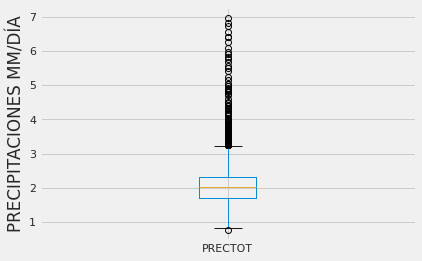

In [ ]:
#DISTRIBUCIÓN PRECTOT
boxprectot = data_v2.boxplot('PRECTOT')
boxprectot.set_ylabel('PRECIPITACIONES MM/DÍA')

In [ ]:
print ("Min: ", np.quantile(data_v2.PRECTOT, 0))
print ("Q1: ", np.quantile(data_v2.PRECTOT, 0.25))
print ("Q2: ", np.quantile(data_v2.PRECTOT, 0.5))
print ("Q3: ", np.quantile(data_v2.PRECTOT, 0.75))
print ("Max: ", np.quantile(data_v2.PRECTOT, 1))

Min:  0.78
Q1:  1.71
Q2:  2.03
Q3:  2.32
Max:  6.97


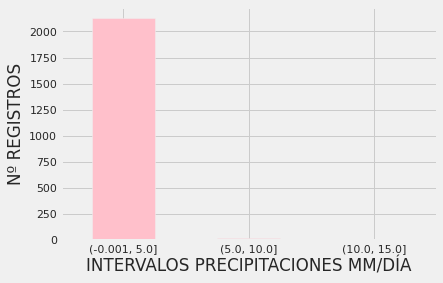

In [ ]:
out = pd.cut(data_v2.PRECTOT, bins=[0, 5, 10, 15], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="pink", figsize=(6,4))
ax.set_xlabel('INTERVALOS PRECIPITACIONES MM/DÍA')
ax.set_ylabel('Nº REGISTROS')
plt.show()

Text(0.5, 1.0, 'Distribución de las Precipitaciones')

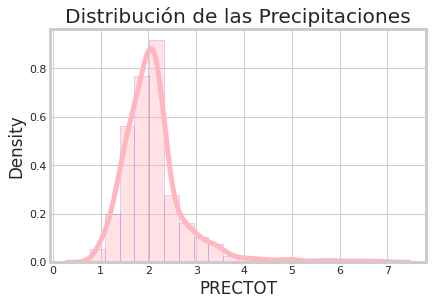

In [ ]:
sns.set_style('whitegrid')

ax = sns.distplot(db['PRECTOT'], hist=True,
             bins=int(180/9), color = 'lightpink', 
             hist_kws={'edgecolor':'blueviolet'},
             kde_kws={'linewidth': 5})
ax.set_xlabel('PRECTOT')
ax.set_title('Distribución de las Precipitaciones')

3.2. T2M

Text(0, 0.5, 'TEMPERATURA EN ºC')

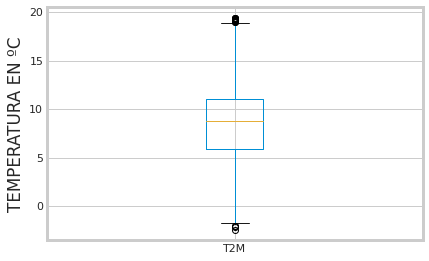

In [ ]:
#DISTRIBUCIÓN T2M
boxt2m = data_v2.boxplot('T2M')
boxt2m.set_ylabel('TEMPERATURA EN ºC')

In [ ]:
print ("Min: ", np.quantile(data_v2.T2M, 0))
print ("Q1: ", np.quantile(data_v2.T2M, 0.25))
print ("Q2: ", np.quantile(data_v2.T2M, 0.5))
print ("Q3: ", np.quantile(data_v2.T2M, 0.75))
print ("Max: ", np.quantile(data_v2.T2M, 1))

Min:  -2.44
Q1:  5.8375
Q2:  8.74
Q3:  11.0725
Max:  19.44


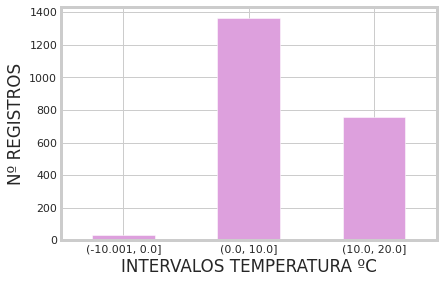

In [ ]:
out2 = pd.cut(data_v2.T2M, bins=[-10, 0, 10, 20], include_lowest=True)
ax2 = out2.value_counts(sort=False).plot.bar(rot=0, color="plum", figsize=(6,4))
ax2.set_xlabel('INTERVALOS TEMPERATURA ºC')
ax2.set_ylabel('Nº REGISTROS')
plt.show()

Text(0.5, 1.0, 'Distribución de la Temperatura')

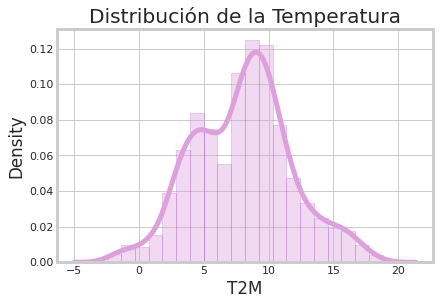

In [ ]:
sns.set_style('whitegrid')

ax = sns.distplot(db['T2M'], hist=True,
             bins=int(180/9), color = 'plum', 
             hist_kws={'edgecolor':'blueviolet'},
             kde_kws={'linewidth': 5})
ax.set_xlabel('T2M')
ax.set_title('Distribución de la Temperatura')

3.3. WS2M

Text(0, 0.5, 'VEOCIDAD DEL VIENTO M/S')

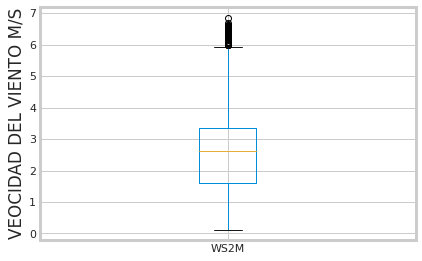

In [ ]:
#DISTRIBUCIÓN ATÍPICOS WS2M
boxws2m = data_v2.boxplot('WS2M')
boxws2m.set_ylabel('VEOCIDAD DEL VIENTO M/S')

In [ ]:
print ("Min: ", np.quantile(data_v2.WS2M, 0))
print ("Q1: ", np.quantile(data_v2.WS2M, 0.25))
print ("Q2: ", np.quantile(data_v2.WS2M, 0.5))
print ("Q3: ", np.quantile(data_v2.WS2M, 0.75))
print ("Max: ", np.quantile(data_v2.WS2M, 1))

Min:  0.12
Q1:  1.61
Q2:  2.61
Q3:  3.35
Max:  6.86


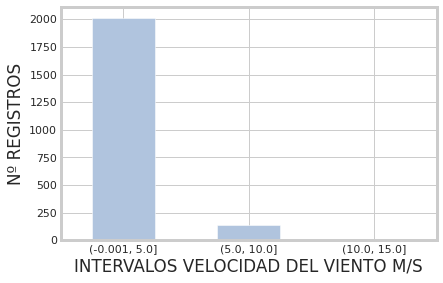

In [ ]:
out3 = pd.cut(data_v2.WS2M, bins=[0, 5, 10, 15], include_lowest=True)
ax3 = out3.value_counts(sort=False).plot.bar(rot=0, color="lightsteelblue", figsize=(6,4))
ax3.set_xlabel('INTERVALOS VELOCIDAD DEL VIENTO M/S')
ax3.set_ylabel('Nº REGISTROS')
plt.show()

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Distribución de la Velocidad del Viento')

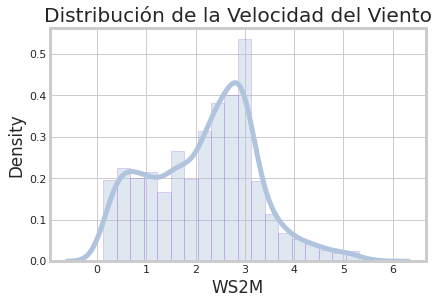

In [ ]:
sns.set_style('whitegrid')

ax = sns.distplot(db['WS2M'], hist=True,
             bins=int(180/9), color = 'lightsteelblue', 
             hist_kws={'edgecolor':'blueviolet'},
             kde_kws={'linewidth': 5})
ax.set_xlabel('WS2M')
ax.set_title('Distribución de la Velocidad del Viento')

# 5. ASIGNAR CUARTIL A CADA VARIABLE

In [ ]:
def cuartil_prectot(x):
  if (x>0) and (x<=1.71):
     return 1
  
  elif (x>1.71) and (x<=2.03):
     return 2
    
  elif (x>2.03) and (x<=2.32):
      return 3
  else:
      return 4 
db['cuartil_prectot'] = db['PRECTOT'].astype(int).apply(lambda x: cuartil_prectot(x))

In [ ]:
db.head()

,Pais,LAT,LON,PRECTOT,T2M,WS2M,cuartil_prectot
0,Italy,36.75,14.75,1.41,18.49,3.59,1
1,Portugal,37.25,-8.25,1.40,17.18,3.60,1
2,Portugal,37.25,-7.75,1.37,17.58,3.44,1
3,Spain,37.25,-7.25,1.34,17.87,3.35,1
4,Spain,37.25,-6.75,1.32,17.93,3.17,1


In [ ]:
def cuartil_t2m(x):
  if (x>-2.44) and (x<=5.85):
     return 1
  
  elif (x>5.85) and (x<=8.74):
     return 2
    
  elif (x>8.74) and (x<=11.07):
      return 3
  else:
      return 4 
db['cuartil_t2m'] = db['T2M'].astype(int).apply(lambda x: cuartil_t2m(x))

In [ ]:
def cuartil_ws2m(x):
  if (x>0) and (x<=1.61):
     return 1
  
  elif (x>1.61) and (x<=2.61):
     return 2
    
  elif (x>2.61) and (x<=3.35):
      return 3
  else:
      return 4 
db['cuartil_ws2m'] = db['WS2M'].astype(int).apply(lambda x: cuartil_ws2m(x))

In [ ]:
db.head()

,Pais,LAT,LON,PRECTOT,T2M,WS2M,cuartil_prectot,cuartil_t2m,cuartil_ws2m
0,Italy,36.75,14.75,1.41,18.49,3.59,1,4,3
1,Portugal,37.25,-8.25,1.40,17.18,3.60,1,4,3
2,Portugal,37.25,-7.75,1.37,17.58,3.44,1,4,3
3,Spain,37.25,-7.25,1.34,17.87,3.35,1,4,3
4,Spain,37.25,-6.75,1.32,17.93,3.17,1,4,3


In [ ]:
#quitamos las columnas con los datos
data_v2_cuartil = db.drop(['PRECTOT', 'T2M', 'WS2M'], axis=1)

In [ ]:
data_v2_cuartil.head()

,Pais,LAT,LON,cuartil_prectot,cuartil_t2m,cuartil_ws2m
0,Italy,36.75,14.75,1,4,3
1,Portugal,37.25,-8.25,1,4,3
2,Portugal,37.25,-7.75,1,4,3
3,Spain,37.25,-7.25,1,4,3
4,Spain,37.25,-6.75,1,4,3


In [ ]:
#descargar como csv 
data_v2_cuartil.to_csv('data_v2cuartil.csv', header=True, index=False)

# ANÁLISIS DE ESPAÑA

In [ ]:
#Seleccionamos solo los datos de España para analizarlos
data_spain = db.loc[:, 'Pais']=='Spain'
db_spain = db.loc[data_spain]

In [ ]:
db_spain.head()

,Pais,LAT,LON,PRECTOT,T2M,WS2M,cuartil_prectot,cuartil_t2m,cuartil_ws2m
3,Spain,37.25,-7.25,1.34,17.87,3.35,1,4,3
4,Spain,37.25,-6.75,1.32,17.93,3.17,1,4,3
5,Spain,37.25,-6.25,1.37,17.99,2.65,1,4,2
14,Spain,37.75,-7.25,1.35,17.20,2.63,1,4,2
15,Spain,37.75,-6.75,1.30,17.01,2.57,1,4,2


Text(0.5, 0, 'Cuartiles')

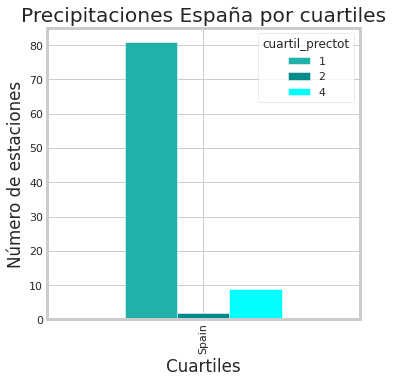

In [ ]:
spainprectot = db_spain.groupby(['Pais','cuartil_prectot']).size().unstack()
colors = ["lightseagreen", 'darkcyan', "aqua"]
spainprectot.plot.bar(stacked = False, color= colors, figsize=(5,5))
plt.title("Precipitaciones España por cuartiles")
plt.ylabel('Número de estaciones')
plt.xlabel('Cuartiles')

Gran parte de España está en el cuartil 1 (el menor) en cuanto a precipitaciones con respecto al resto de Europa.

Text(0.5, 0, 'Cuartiles')

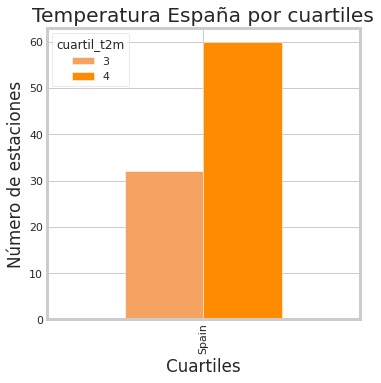

In [ ]:
spaint2m = db_spain.groupby(['Pais','cuartil_t2m']).size().unstack()
colors = ["sandybrown", 'darkorange', "tan"]
spaint2m.plot.bar(stacked = False, color= colors, figsize=(5,5))
plt.title("Temperatura España por cuartiles")
plt.ylabel('Número de estaciones')
plt.xlabel('Cuartiles')

En España predominan las temperaturas más altas de todo Europa.

Text(0.5, 0, 'Cuartiles')

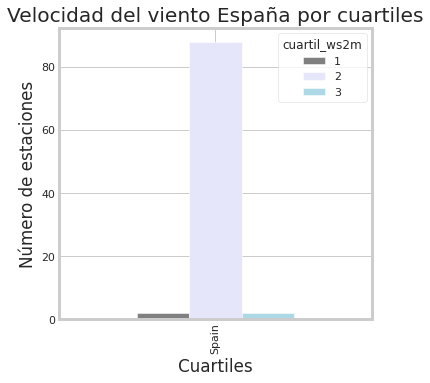

In [ ]:
spainws2m = db_spain.groupby(['Pais','cuartil_ws2m']).size().unstack()
colors = ["grey", 'lavender', "lightblue"]
spainws2m.plot.bar(stacked = False, color= colors, figsize=(5,5))
plt.title("Velocidad del viento España por cuartiles")
plt.ylabel('Número de estaciones')
plt.xlabel('Cuartiles')

La mayoría del territorio español se encuentra en el segundo cuartil en cuanto a velocidad del viento.

# AGRUPAR LOS DATOS EN ESTACIONES

In [ ]:
data.head()

,LAT,LON,PARAMETER,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.25,1.25,PRECTOT,1.92,1.64,1.61,2.40,2.36,2.02,1.44,1.57,1.96,1.95,2.21,1.87,1.91
1,44.25,1.25,T2M,4.23,5.21,8.28,11.12,15.42,19.11,21.93,22.18,18.22,13.98,8.01,4.99,12.72
2,44.25,1.25,WS2M,2.55,2.75,2.75,2.72,2.37,2.28,2.19,2.04,2.15,2.48,2.49,2.51,2.44
3,44.25,1.75,PRECTOT,1.89,1.67,1.65,2.47,2.42,2.03,1.36,1.56,2.03,2.02,2.24,1.89,1.94
4,44.25,1.75,T2M,3.74,4.65,7.72,10.56,14.88,18.58,21.43,21.69,17.71,13.47,7.54,4.53,12.21


In [ ]:
from statistics import mean
#HACEMOS EL PROMEDIO DE LAS ESTACIONES SOBRE DATA
data['INVIERNO'] = data[["JAN", "FEB", "MAR"]].mean(axis=1)
data['PRIMAVERA'] = data[["APR", "MAY", "JUN"]].mean(axis=1)
data['VERANO'] = data[["JUL", "AUG", "SEP"]].mean(axis=1)
data['OTONO'] = data[["OCT", "NOV", "DEC"]].mean(axis=1)

In [ ]:
#En data_v3 eliminamos los meses para quedarnos solo con las estaciones del año.
data_v3 = data.drop(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], axis=1)

In [ ]:
data_v3.head()

,LAT,LON,PARAMETER,ANN,INVIERNO,PRIMAVERA,VERANO,OTONO
0,44.25,1.25,PRECTOT,1.91,1.723333,2.260000,1.656667,2.010000
1,44.25,1.25,T2M,12.72,5.906667,15.216667,20.776667,8.993333
2,44.25,1.25,WS2M,2.44,2.683333,2.456667,2.126667,2.493333
3,44.25,1.75,PRECTOT,1.94,1.736667,2.306667,1.650000,2.050000
4,44.25,1.75,T2M,12.21,5.370000,14.673333,20.276667,8.513333


In [ ]:
def obtener_pais(lon, lat):
    pais = cc.getCountry(countries.Point(lat, lon))
    if pais is None:
        return "desconocido"
    return pais

data_v3.loc[:, 'Pais'] = data_v3.loc[:, ['LAT', 'LON']].apply(lambda row: obtener_pais(row['LON'], row['LAT']), axis=1)

In [ ]:
data_v3 = data_v3[data_v3['Pais']!='desconocido']

In [ ]:
data_v3.head()

,LAT,LON,PARAMETER,ANN,INVIERNO,PRIMAVERA,VERANO,OTONO,Pais
0,44.25,1.25,PRECTOT,1.91,1.723333,2.260000,1.656667,2.010000,France
1,44.25,1.25,T2M,12.72,5.906667,15.216667,20.776667,8.993333,France
2,44.25,1.25,WS2M,2.44,2.683333,2.456667,2.126667,2.493333,France
3,44.25,1.75,PRECTOT,1.94,1.736667,2.306667,1.650000,2.050000,France
4,44.25,1.75,T2M,12.21,5.370000,14.673333,20.276667,8.513333,France


In [ ]:
data_v3_sinT2M = data_v3[~data_v3['PARAMETER'].astype(str).str.startswith('T2M')]
data_v3_PRECTOT = data_v3_sinT2M[~data_v3['PARAMETER'].astype(str).str.startswith('WS2M')]
data_v3_WS2M = data_v3_sinT2M[~data_v3['PARAMETER'].astype(str).str.startswith('PRECTOT')]
data_v3_sinPRECTOT = data_v3[~data_v3['PARAMETER'].astype(str).str.startswith('PRECTOT')]
data_v3_T2M = data_v3_sinPRECTOT[~data_v3['PARAMETER'].astype(str).str.startswith('WS2M')]

In [ ]:
data_v3_PRECTOT.head()

,LAT,LON,PARAMETER,ANN,INVIERNO,PRIMAVERA,VERANO,OTONO,Pais
0,44.25,1.25,PRECTOT,1.91,1.723333,2.260000,1.656667,2.010000,France
3,44.25,1.75,PRECTOT,1.94,1.736667,2.306667,1.650000,2.050000,France
6,44.25,2.25,PRECTOT,1.99,1.776667,2.333333,1.673333,2.173333,France
9,44.25,2.75,PRECTOT,2.11,1.860000,2.380000,1.716667,2.490000,France
12,44.25,3.25,PRECTOT,2.27,1.946667,2.426667,1.763333,2.936667,France


In [ ]:
data_v3_T2M.head()

,LAT,LON,PARAMETER,ANN,INVIERNO,PRIMAVERA,VERANO,OTONO,Pais
1,44.25,1.25,T2M,12.72,5.906667,15.216667,20.776667,8.993333,France
4,44.25,1.75,T2M,12.21,5.370000,14.673333,20.276667,8.513333,France
7,44.25,2.25,T2M,11.31,4.360000,13.660000,19.566667,7.636667,France
10,44.25,2.75,T2M,10.20,3.203333,12.460000,18.546667,6.570000,France
13,44.25,3.25,T2M,9.46,2.460000,11.743333,17.800000,5.836667,France


In [ ]:
data_v3_WS2M.head()

,LAT,LON,PARAMETER,ANN,INVIERNO,PRIMAVERA,VERANO,OTONO,Pais
2,44.25,1.25,WS2M,2.44,2.683333,2.456667,2.126667,2.493333,France
5,44.25,1.75,WS2M,2.54,2.763333,2.556667,2.223333,2.606667,France
8,44.25,2.25,WS2M,2.59,2.780000,2.600000,2.320000,2.663333,France
11,44.25,2.75,WS2M,2.47,2.666667,2.470000,2.220000,2.540000,France
14,44.25,3.25,WS2M,2.08,2.286667,2.066667,1.840000,2.110000,France


In [ ]:
#GUARDAR LOS CSV PARA PODER VISUALIZARLOS EN TABLEAU
data_v3_PRECTOT.to_csv('data_v3_PRECTOT.csv', header=True, index=False, sep=';')
data_v3_T2M.to_csv('data_v3_T2M.csv', header=True, index=False, sep=';')
data_v3_WS2M.to_csv('data_v3_WS2M.csv', header=True, index=False, sep=';')

# 6. TRAIN Y TEST

In [ ]:
#Como se trata de una regresión, utilizaremos el modelo conocido como 
#Linear Regression. 
#Para lo cual, vamos a importar todas las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

import xgboost as xg

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import svm #support vector Machine
from sklearn.naive_bayes import GaussianNB #Naive bayes

In [ ]:
data_v2.head()

PARAMETER,LAT,LON,variable,PRECTOT,T2M,WS2M
0,36.25,11.25,ANN,1.20,19.19,4.76
1,36.25,11.75,ANN,1.22,19.15,4.87
2,36.25,12.25,ANN,1.32,19.13,4.93
3,36.25,12.75,ANN,1.44,19.14,4.95
4,36.25,13.25,ANN,1.54,19.18,4.94


In [ ]:
data_v2_trainv2 = data_v2.drop(['variable'], axis=1)

In [ ]:
data_v2_trainv2.head()

PARAMETER,LAT,LON,PRECTOT,T2M,WS2M
0,36.25,11.25,1.20,19.19,4.76
1,36.25,11.75,1.22,19.15,4.87
2,36.25,12.25,1.32,19.13,4.93
3,36.25,12.75,1.44,19.14,4.95
4,36.25,13.25,1.54,19.18,4.94


In [ ]:
data_v2_trainv2.round()

PARAMETER,LAT,LON,PRECTOT,T2M,WS2M
0,36.0,11.0,1.0,19.0,5.0
1,36.0,12.0,1.0,19.0,5.0
2,36.0,12.0,1.0,19.0,5.0
3,36.0,13.0,1.0,19.0,5.0
4,36.0,13.0,2.0,19.0,5.0
...,...,...,...,...,...
2143,65.0,25.0,2.0,2.0,2.0
2144,65.0,26.0,2.0,2.0,1.0
2145,65.0,26.0,2.0,1.0,1.0
2146,65.0,27.0,2.0,1.0,0.0


In [ ]:
data_v2_trainv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LAT      2148 non-null   float64
 1   LON      2148 non-null   float64
 2   PRECTOT  2148 non-null   float64
 3   T2M      2148 non-null   float64
 4   WS2M     2148 non-null   float64
dtypes: float64(5)
memory usage: 84.0 KB


In [ ]:
data_v2_trainv2.astype(np.int64)

PARAMETER,LAT,LON,PRECTOT,T2M,WS2M
0,36,11,1,19,4
1,36,11,1,19,4
2,36,12,1,19,4
3,36,12,1,19,4
4,36,13,1,19,4
...,...,...,...,...,...
2143,65,25,1,1,1
2144,65,25,2,1,0
2145,65,26,2,1,0
2146,65,26,2,0,0


**PREPARAMOS LOS DATOS PARA HACER EL TRAIN Y EL TEST DATA_V2_TRAINV2**








In [ ]:
train_features = ['LAT', 'LON', 'PRECTOT', 'T2M']
train_X = pd.get_dummies(data_v2_trainv2[train_features])
train_Y = data_v2_trainv2['WS2M']
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=.20)

In [ ]:
train_features = ['LAT', 'LON', 'WS2M', 'T2M']
train_X = pd.get_dummies(data_v2_trainv2[train_features])
train_Y = data_v2_trainv2['PRECTOT']
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=.20)

In [ ]:
train_Y.describe()

count    1718.000000
mean        2.628917
std         1.432654
min         0.120000
25%         1.610000
50%         2.620000
75%         3.337500
max         6.860000
Name: WS2M, dtype: float64

In [ ]:
train_X.head()

PARAMETER,LAT,LON,PRECTOT,T2M
1170,51.25,8.25,2.45,7.99
23,36.75,22.25,1.66,17.61
1460,54.25,31.25,2.11,4.69
370,41.75,24.75,1.50,10.14
0,36.25,11.25,1.20,19.19


In [ ]:
cond = (train_X['LAT'] == 43.75)&(train_X['LON'] == 16.75)
train_X.loc[cond, :]

PARAMETER,LAT,LON,PRECTOT,T2M
504,43.75,16.75,2.38,10.36


In [ ]:
cond = (test_X['LAT'] == 43.75)&(test_X['LON'] == 16.75)
test_X.loc[cond, :]

PARAMETER,LAT,LON,PRECTOT,T2M


In [ ]:
train_Y.head()

1170    2.98
23      3.40
1460    2.41
370     1.15
0       4.76
Name: WS2M, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg=LinearRegression()
linear_reg.fit(train_X,train_Y)
y_pred=linear_reg.predict(test_X)

cv_scores_linreg = cross_val_score(linear_reg, train_X, train_Y, cv=5)
r2=linear_reg.score(test_X, test_Y)
print("R^2: {}".format(r2))
adj_r2 = 1 - (1 - r2 ** 2) * ((train_X.shape[1] - 1) / (train_X.shape[0] - train_X.shape[1] - 1))
print("Adjusted R^2: {}".format(adj_r2))

rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
print(cv_scores_linreg)

R^2: 0.4295876324938881
Adjusted R^2: 0.9985718835971834
Root Mean Squared Error: 1.05662184156944
Average 5-Fold CV Score: 0.42394697842283335
[0.41783946 0.34640343 0.49137319 0.39999283 0.46412599]


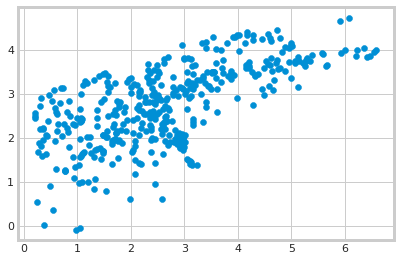

In [ ]:
plt.scatter(test_Y, y_pred)

Text(0.5, 1.0, 'Distribución de la Temperatura Predicha')

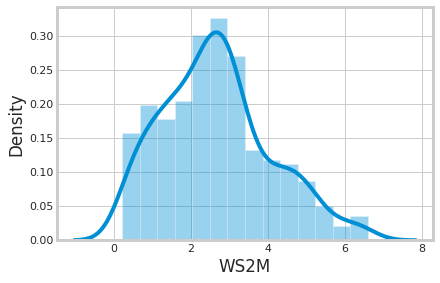

In [ ]:
#Para ver cómo se ha comportado la variable a predecir:
sns.distplot(test_Y)
ax.set_title('Distribución de la Temperatura Predicha')

Text(0.5, 1.0, 'Distribución de la Temperatura')

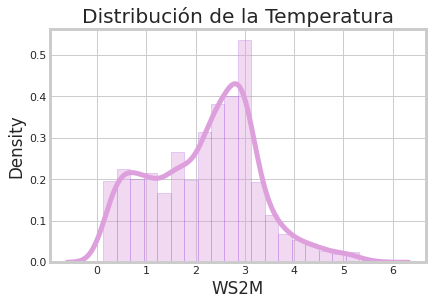

In [ ]:
#Lo comparamos con la forma de los datos del train:
sns.set_style('whitegrid')

ax = sns.distplot(db['WS2M'], hist=True,
             bins=int(180/9), color = 'plum', 
             hist_kws={'edgecolor':'blueviolet'},
             kde_kws={'linewidth': 5})
ax.set_xlabel('WS2M')
ax.set_title('Distribución de la Temperatura')

In [ ]:
test_Y.head()

576    1.57
79     5.34
932    1.34
543    3.41
145    5.27
Name: WS2M, dtype: float64

In [ ]:
train_X.head()

PARAMETER,LAT,LON,PRECTOT,T2M
1170,51.25,8.25,2.45,7.99
23,36.75,22.25,1.66,17.61
1460,54.25,31.25,2.11,4.69
370,41.75,24.75,1.50,10.14
0,36.25,11.25,1.20,19.19


In [ ]:
train_Y.head()

1170    2.98
23      3.40
1460    2.41
370     1.15
0       4.76
Name: WS2M, dtype: float64

In [ ]:
test_X.head()

PARAMETER,LAT,LON,PRECTOT,T2M
576,44.75,9.25,2.40,12.39
79,37.75,25.25,1.28,17.94
932,48.25,14.75,2.52,7.38
543,44.25,12.75,1.96,15.34
145,38.75,25.25,1.56,17.45


In [ ]:
test_Y.head()

576    1.57
79     5.34
932    1.34
543    3.41
145    5.27
Name: WS2M, dtype: float64

In [ ]:
data_v2_trainv2.loc[2079]

PARAMETER
LAT        63.25
LON         6.75
PRECTOT     3.82
T2M         7.65
WS2M        5.06
Name: 2079, dtype: float64

In [ ]:
test_Y.loc[2079]

KeyError: ignored

In [ ]:
data_v2_trainv2.loc[440]

In [ ]:
test_Y.loc[440]

In [ ]:
test_X.loc[506]

In [ ]:
test_Y.loc[506]

In [ ]:
data_v2_trainv2.loc[506]

In [ ]:
x=data_v2_trainv2.WS2M.loc[506]
y=test_Y.loc[506]

In [ ]:
test_Y

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
fig,ax=plt.subplots()
for color in ['tab:blue', 'tab:orange']:
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
x2=data_v2_trainv2[data_v2_trainv2.index.isin(test_Y.index)]
y2=test_Y

In [ ]:
x2=x2.T2M

In [ ]:
fig,ax=plt.subplots()
for color in ['tab:blue', 'tab:orange']:
    scale = 100.0 * np.random.rand(n)
    ax.scatter(x2, y2, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()